## Hausarbeit - Abgabe 3 - Aufgabe 1
• Implementieren Sie das in der Vorlesung gezeigte “Gradient Descent” 
Beispiel in numpy

• Implementieren Sie eine Ausgleichsgerade mit dem Verfahren der 
kleinsten Quadrate für die in der Vorlesung gezeigten Daten
### Laden der nötigen Bibliotheken

In [1]:
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt 

### 1. Aufgabe:
Implementieren Sie das in der Vorlesung gezeigte “Gradient Descent” 
Beispiel in numpy

In [2]:
### Gradient Descent: 

# 1.Schritt: Einlesen der Daten: 
values = np.loadtxt('vl5_data.csv')

# 2.Schritt: Aufteilen der Daten in die gegebenen Einheiten
t_u = np.array(values[:,1])   # temperature in Celsius
t_c = np.array(values[:,0])   # unknown units

In [3]:
# 3.Schritt: Definition der Funktionen
def model(t_u, w, b):
    return w * t_u + b

In [4]:
# 4.Schritt: Definition der Ableitungen
### DERIVATIVES ###
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def dloss_fn(t_p, t_c):
    dsq_diffs=2* (t_p - t_c) / np.size(t_p, 0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [5]:
# 5.Schritt: Berechnung des Gradientens und des Training Loops
## Definition Gradient
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return np.stack([dloss_dw.sum(), dloss_db.sum()])

## Definition Training Loop
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):

        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad

        # Ausgabe der einzelnen Epochen
        # print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [6]:
# 6.Schritt: Durchführung der Berechnung der Parameter für die Gerade
# Normierung der Werte t_u
t_un = 0.1 * t_u


params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = np.array([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c)

params

# Berechnung des Models
t_p = model(t_un, *params)

Text(0, 0.5, 'Temperature (°Celsius)')

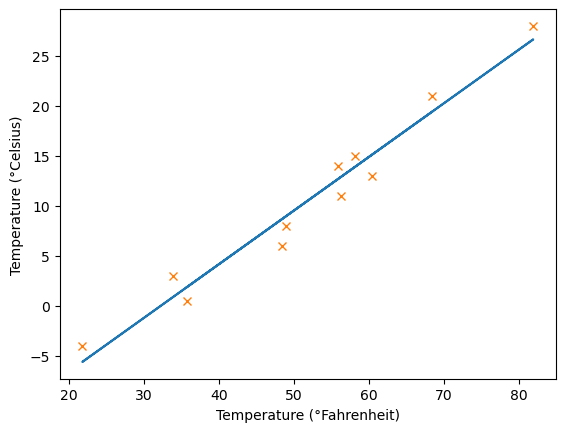

In [7]:
# 7.Schritt: Darstellung der Geraden zusammen mit den Daten
fig = plt.figure()
plt.plot(t_u, t_p)
plt.plot(t_u, t_c, 'x')
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")

## Hausarbeit - Abgabe 3 - Aufgabe 2

### 2. Aufgabe
Implementieren Sie eine Ausgleichsgerade mit dem Verfahren der 
kleinsten Quadrate für die in der Vorlesung gezeigten Daten